In [1]:
# Imports
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 
import numpy as np
import scipy.stats as stats
import io
import requests
import warnings
warnings.filterwarnings('ignore')

# Load data
url="https://ndownloader.figshare.com/files/10185495"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

# Color Scheme
KIT_COLORS = ["#009682", "#4664aa", "#a3107c", "#df9b1b", "#fce500", "#8cb63c","#a22223", "#a7822e", "#23a1e0" ]

# RC Params
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 12)

# Figure 1: Sample Properties

## (a) Sample sizes

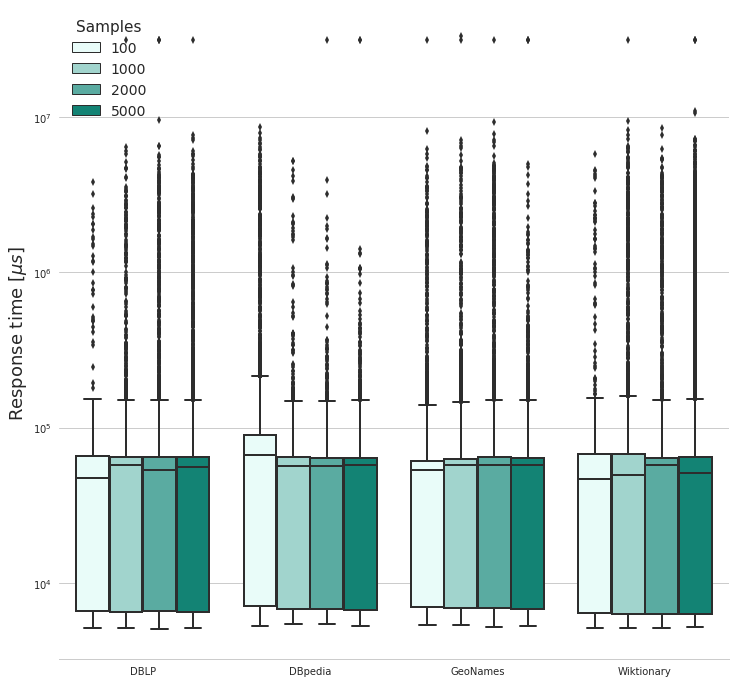

In [2]:
df_f1 = df[df['study'] == 2]
vplot = sns.boxplot(x="Source", y="ms", hue='Samples', data=df_f1, color=KIT_COLORS[0])
vplot.set_yscale("log")
vplot.set_ylabel("Response time [$\mu s$]")
vplot.set_xlabel("")
sns.despine(left=True)
sns.set(font_scale=1)
sns.set_style("whitegrid") 

## (b) Sample cardinalities

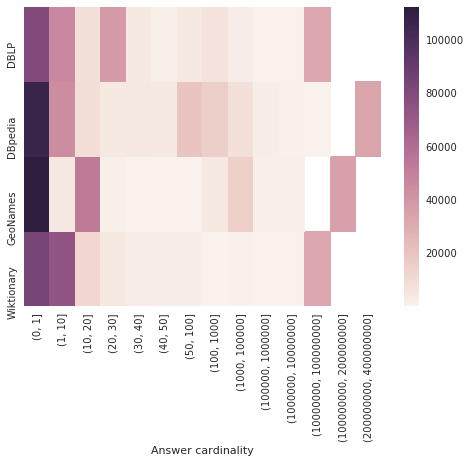

In [3]:
df_f1['bin'] = pd.cut(df_f1['total_items'], bins=[0,1, 10, 20, 30, 40, 50 ,100, 1000, 100000, 1000000, 10000000, 100000000, 200000000, 400000000])
total_items_count = pd.pivot_table(df_f1, columns=['bin'], index=['Source'], values='total_items', aggfunc='count' )
hm = sns.heatmap(total_items_count)
plt.ylabel("")
plt.xlabel("Answer cardinality")

# Figure 2: Relative response time

Mean delta_d = 0.0016327309002


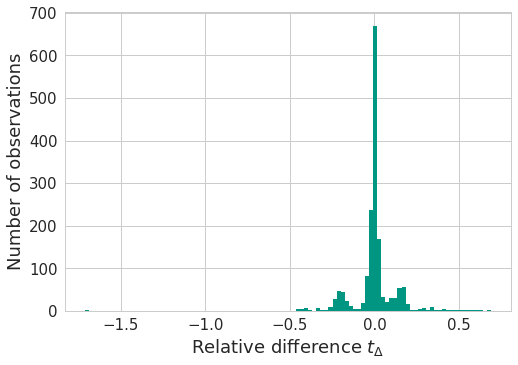

In [4]:
df_f2 = df[(df['study'] == 3) & (df['Environment'] == "Controlled")]
more_than_one_page = df_f2[df_f2['page'] > 1]
print("Mean delta_d = " + str( np.mean(more_than_one_page['relative_page_change'])))
plt.hist(more_than_one_page['relative_page_change'], bins=100, color=KIT_COLORS[0], normed=False)
plt.ylabel("Number of observations", fontsize=18)
plt.xlabel("Relative difference $t_{\Delta}$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)

# Figure 3: Boxplot pattern types

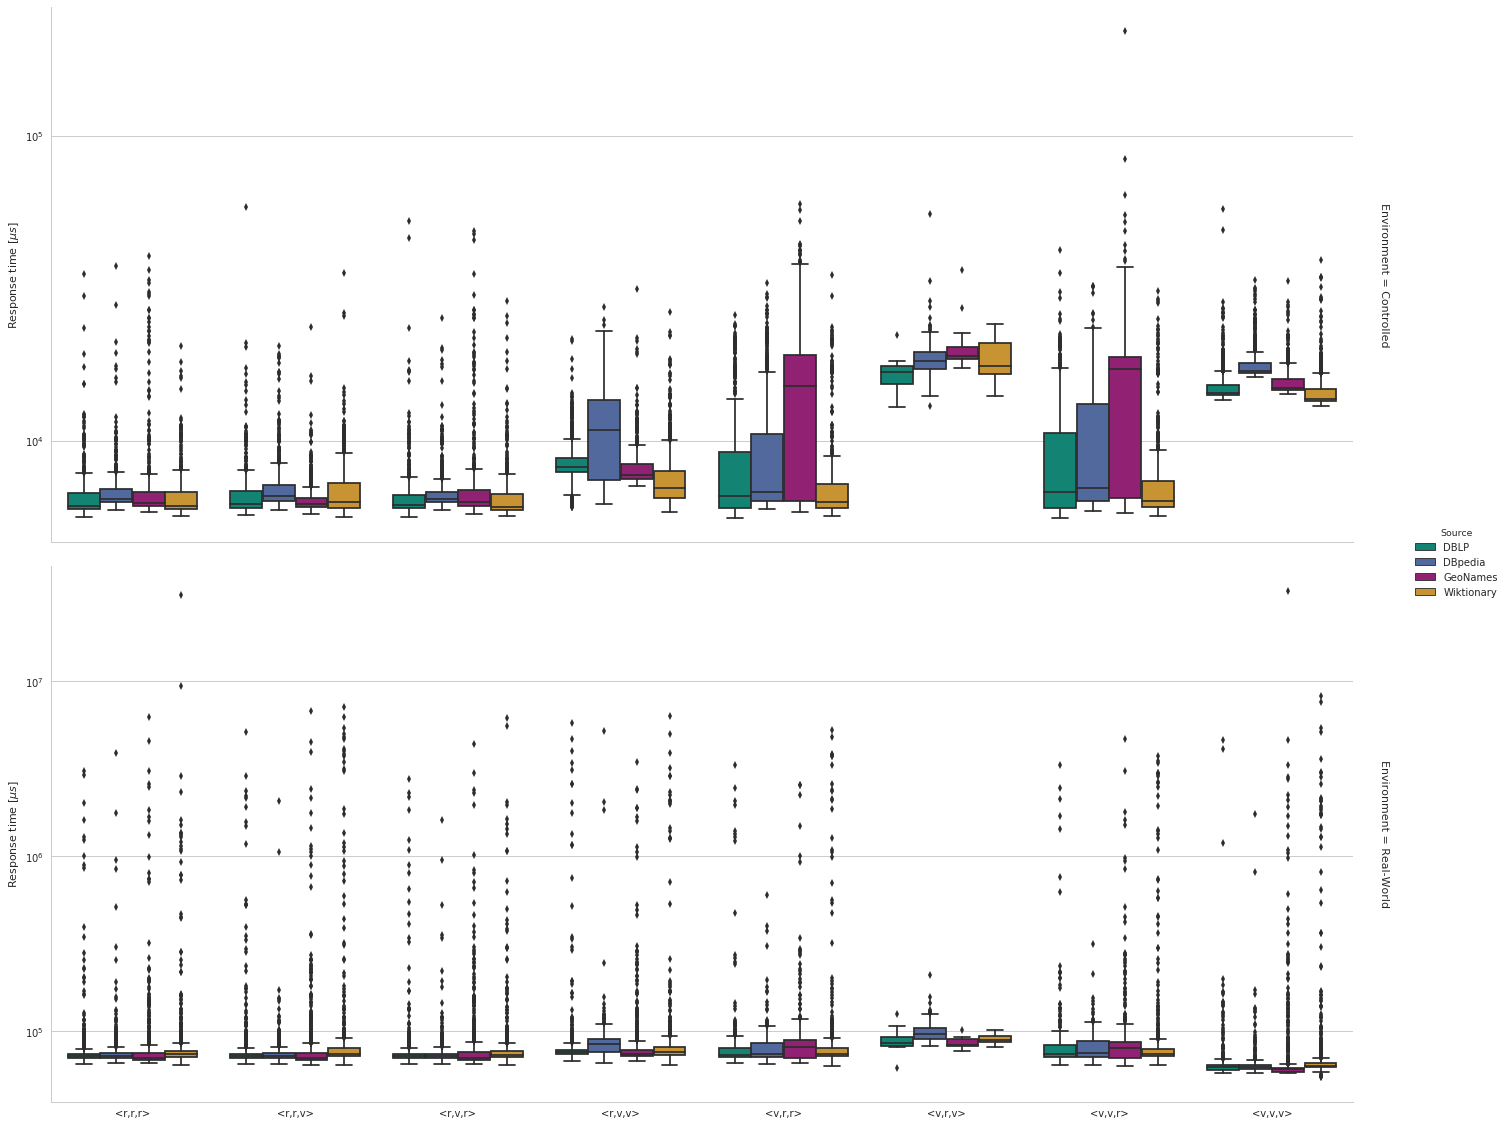

In [5]:
df_f3 = df[(df['study'] == 1) & (df['Cache'] == False)] 
fp = sns.factorplot(x="category", y="ms", hue="Source",  row="Environment", data=df_f3, kind="box",  
                size=8, aspect=2.5, palette=KIT_COLORS, legend_out=True, margin_titles=True, sharey=False, order=sorted(df_f3['category'].unique()))
fp.set(xlabel='', ylabel="Response time [$\mu s$]")
sns.set(font_scale=2.5) 
fp.fig.get_axes()[0].set_yscale('log')
fp.fig.get_axes()[1].set_yscale('log')
sns.set_style("whitegrid")

# Table 4: Mean number of results per pattern type

In [6]:
df_t4 = df[(df['study'] == 1) & (df['Cache'] == False)] 
mean_results = pd.pivot_table(df_t4, columns=['Source'], index=['category'], values='total_items', aggfunc=np.mean)
mean_results = mean_results.applymap(lambda x: '%.2E' % x)
mean_results = mean_results.transpose()
mean_results

category,"<r,r,r>","<r,r,v>","<r,v,r>","<r,v,v>","<v,r,r>","<v,r,v>","<v,v,r>","<v,v,v>"
Source,,,,,,,,
DBLP,1.00E+00,2.56E+00,1.18E+01,2.22E+01,3.85E+03,4.48E+06,3.87E+03,8.82E+07
DBpedia,1.00E+00,4.80E+00,2.83E+01,5.55E+01,2.35E+03,9.85E+05,5.76E+03,3.77E+08
GeoNames,1.00E+00,1.10E+00,8.18E+00,1.51E+01,3.13E+04,5.13E+06,3.31E+04,1.23E+08
Wiktionary,1.00E+00,5.39E+00,6.55E+00,1.21E+01,1.17E+04,3.47E+06,1.17E+04,6.44E+07


# Figure 4: Relative response time

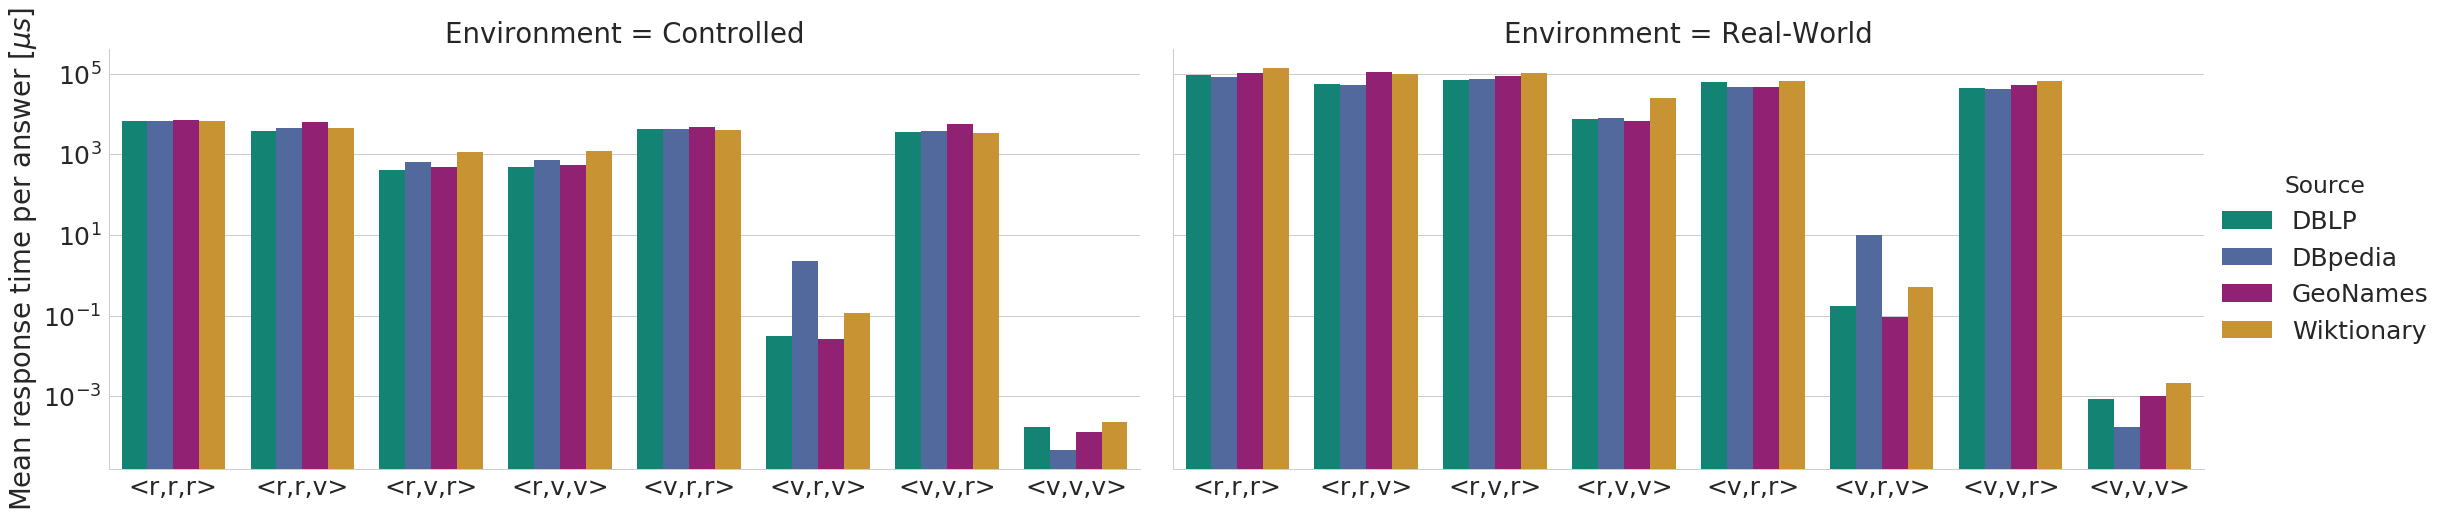

In [7]:
df_f4 = df[(df['study'] == 1) & (df['Cache'] == False)] 
rel_ms = sns.factorplot(x="category", y="ms_per_res", hue="Source",  col="Environment", data=df_f4, kind="bar", ci=None,
                size=8, aspect=2, palette=KIT_COLORS, sharey=True, order=sorted(df_f4['category'].unique()))
rel_ms.set(xlabel='')
sns.set(font_scale=2.5) 
rel_ms.fig.get_axes()[0].set_ylabel("Mean response time per answer [$\mu s$]")
rel_ms.fig.get_axes()[0].set_yscale('log')
rel_ms.fig.get_axes()[1].set_yscale('log')
sns.set_style('whitegrid')

# Figure 5: Resonse time / answer cardinality scatter plot

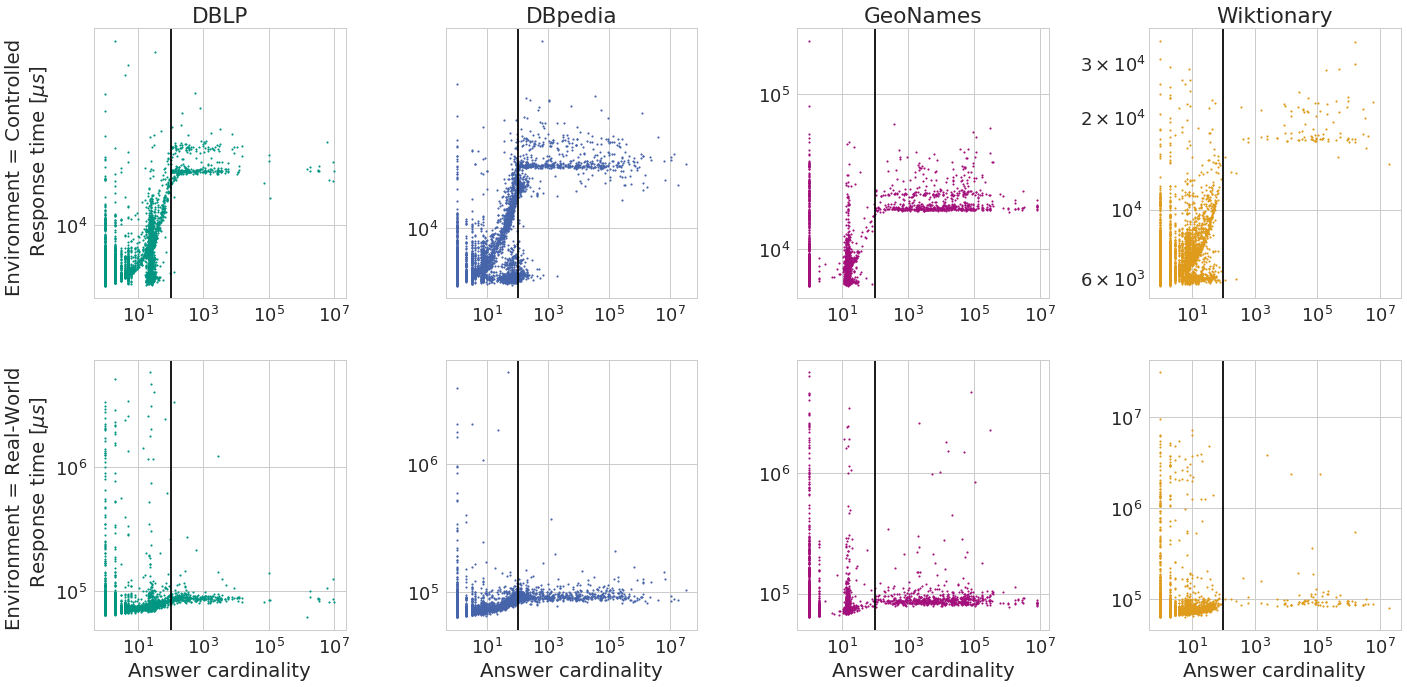

In [8]:
df_f5 = df[(df['study'] == 1) & (df['Cache'] == False)] 
sns.set(font_scale=1.8)
sns.set_style('whitegrid')
fig, ax  = plt.subplots(2, 4, sharey=False, figsize=(20,10))
sources = list(df_f5['Source'].unique())
sources.extend(sources)
colrs = KIT_COLORS[:4]
colrs.extend(colrs)
for server, color, i in zip(sources, colrs, range(8)):
    k = int(i % 4)
    j = int(i / 4)
    sax = ax[j][k]
    if i < 4:
        a = df_f5[(df_f5['Source'] == server) & (df_f5['category'] != "<v,v,v>") & (df_f5['Environment'] == "Controlled")]
        sax.set_title(server)
    else:
        a = df_f5[(df_f5['Source'] == server) & (df_f5['category'] != "<v,v,v>")& (df_f5['Environment'] == "Real-World")]
    if i == 0:
        env = "Controlled"
        sax.set_ylabel("Environment = {0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    if i == 4:
        env = "Real-World"
        sax.set_ylabel("Environment = {0} \n Response time [$\mu s$]".format(env)) #, fontsize=12)
    sax.scatter(a['total_items'], a['ms'], c = color, label=server, s=3)
    if i >= 4:
        sax.set_xlabel("Answer cardinality")
    sax.set_yscale('log')
    sax.set_xscale('log')
    sax.axvline(100, c='#000000')
plt.tight_layout()

# Figure 6: Caching 

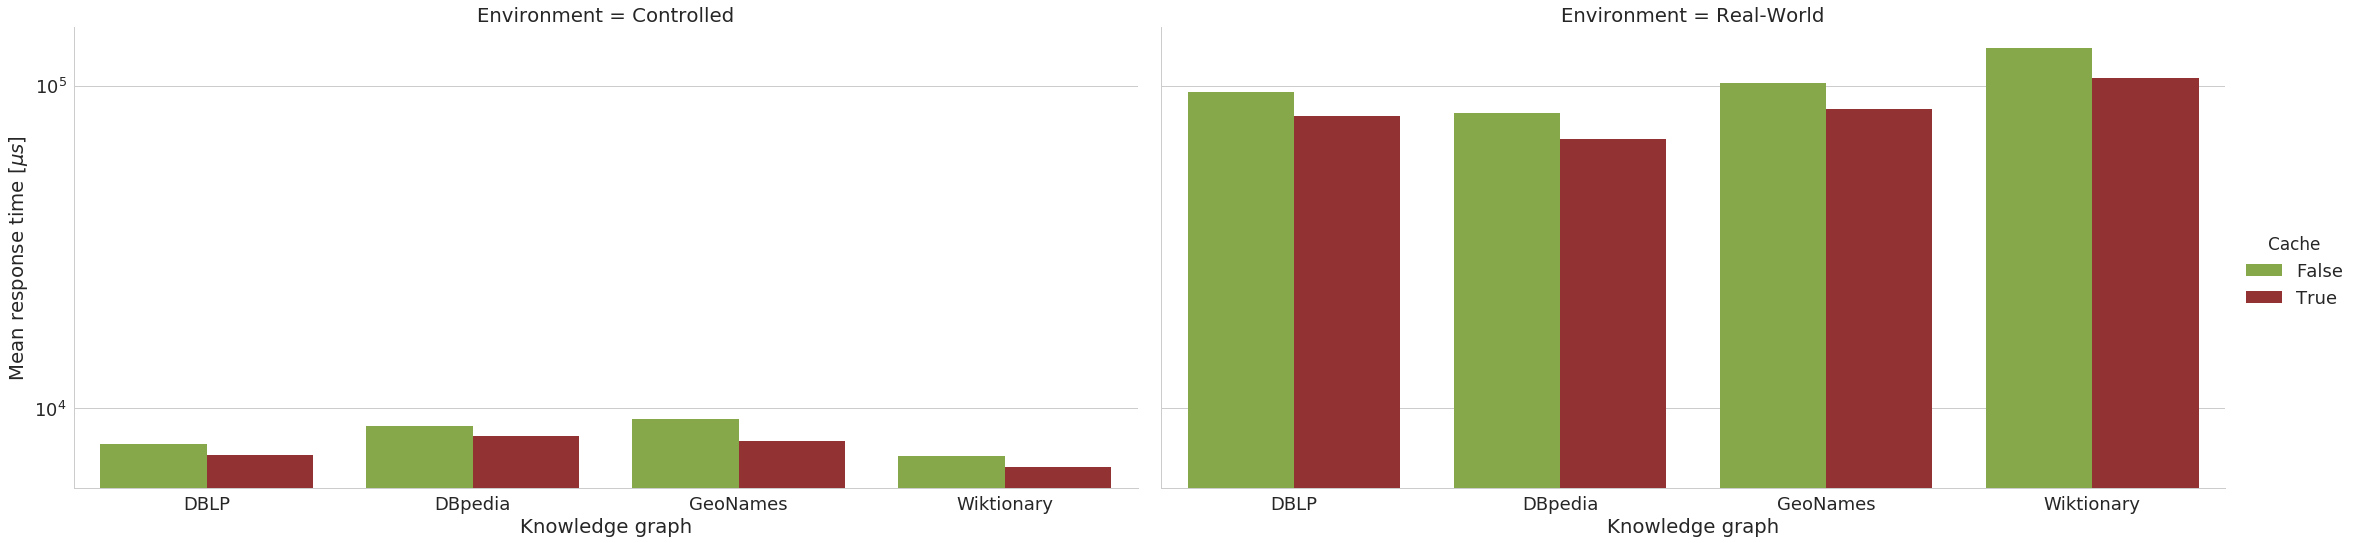

In [9]:
df_f6 = df[(df['study'] == 1) & (df['category'] != "<v,v,v>")]
fp2 = sns.factorplot(x="Source", y="ms", hue="Cache",  col="Environment", data=df_f6, kind="bar", ci=None,
                size=8, aspect=2, palette=KIT_COLORS[5:], sharey=True)
sns.set(font_scale=2.5)
fp2.fig.get_axes()[0].set_ylabel("Mean response time [$\mu s$]")
fp2.fig.get_axes()[0].set_xlabel("Knowledge graph")
fp2.fig.get_axes()[1].set_xlabel("Knowledge graph")
fp2.fig.get_axes()[0].set_yscale('log')
fp2.fig.get_axes()[1].set_yscale('log')
sns.set_style('whitegrid')

# Figure 7: KG / TPF instance relation 

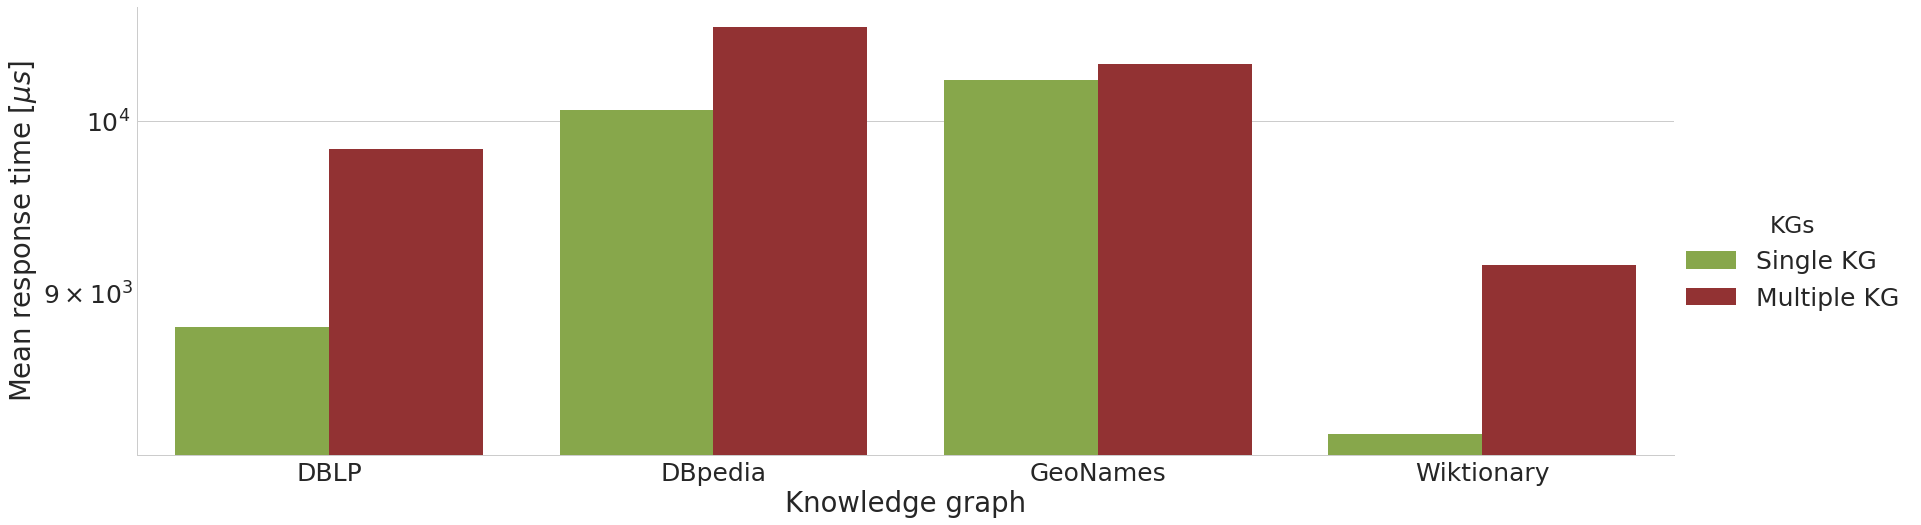

In [10]:
df_f7 = df[(df['study'] == 4) & (df['Cache'] == False) & (df['Environment'] == "Controlled")]
fp3 = sns.factorplot(x="Source", y="ms", hue="KGs", data=df_f7, kind="bar", ci=None,
                size=8, aspect=3, palette=KIT_COLORS[5:], sharey=True)
sns.set(font_scale=2.5)
fp3.fig.get_axes()[0].set_ylabel("Mean response time [$\mu s$]")
fp3.fig.get_axes()[0].set_xlabel("Knowledge graph")
fp3.fig.get_axes()[0].set_yscale('log')
sns.set_style('whitegrid')